# Compute performance metrics for the given Y and Y_score without sklearn

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
# other than these two you should not import any other packages


## A. Compute performance metrics for the given data '5_a.csv'
 <pre>  <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [2]:
# write your code here for task A
df_a=pd.read_csv('5_a.csv')
new=df_a.copy()                            # Making new copy

new['proba']=new['proba'].apply(lambda x: 1 if(x>=.5) else 0)  # 𝑦𝑝𝑟𝑒𝑑=[0 if y_score < 0.5 else 1] 
arr=np.array(new)
def confusion(arr): 
    tn=fn=fp=tp=0
    for i in arr:
        if i[0]==0:
            if i[1]==0:
                tn+=1
            else:
                fn+=1
        else:
            if i[1]==0:
                fp+=1
            else:
                tp+=1
    return tn,fn,tp,fp

tn,fn,tp,fp=confusion(arr)

con_mat=np.array([[tn,fn],[fp,tp]])
print("confusion matrix:-\n",con_mat)

pr=tp/(tp+fp)
re=tp/(fn+tp)
f1_sco=((2*pr*re)/(pr+re))              # f1-score = 2*re*pr/re+pr
print("f1_score:-",f1_sco)

acc=((tp+tn)/(tp+tn+fn+fp))             # accuracy = correctly classified pts/ total no. of pts
print("accuracy:-",acc)

auc_ds=df_a.sort_values("proba",axis=0,ascending = False)   # "inplace=True" for same dataset.
arr=np.array(auc_ds)
arr1=np.array(df_a)
y_true=np.array(arr1[:,0])
y_prob=np.array(arr1[:,1])
thresholds=np.array(arr[:,1])


def tpr_fpr(y_true, y_prob, thresholds):            
    fpr = []
    tpr = []
    for threshold in thresholds:
        y_pred = np.where(y_prob >= threshold, 1, 0)
        fp = np.sum((y_pred == 1) & (y_true == 0))
        tp = np.sum((y_pred == 1) & (y_true == 1))
        fn = np.sum((y_pred == 0) & (y_true == 1))
        tn = np.sum((y_pred == 0) & (y_true == 0))
        fpr.append(fp / (fp + tn))
        tpr.append(tp / (tp + fn))
    return tpr, fpr

tpr,fpr=tpr_fpr(y_true, y_prob, thresholds)




confusion matrix:-
 [[    0   100]
 [    0 10000]]
f1_score:- 0.9950248756218906
accuracy:- 0.9900990099009901


#https://stackoverflow.com/questions/61321778/how-to-calculate-tpr-and-fpr-in-python-without-using-sklearn
function tpr_fpr is taken from above link

AUC_a:- 0.48829900000000004


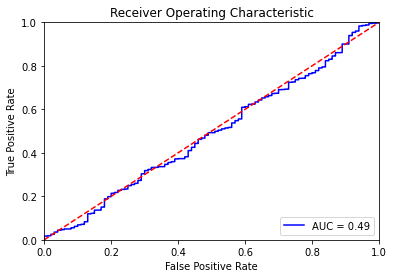

In [10]:
#print(len(tpr),len(fpr))
auc_a=np.trapz(tpr, fpr)
print("AUC_a:-",auc_a)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc_a)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()





## B. Compute performance metrics for the given data '5_b.csv'
<pre>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a>
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [6]:
# write your code here for task B
df_b=pd.read_csv('5_b.csv')
new1=df_b.copy()                                            # Making new copy

new1['proba']=new1['proba'].apply(lambda x: 1 if(x>=.5) else 0)  # 𝑦𝑝𝑟𝑒𝑑=[0 if y_score < 0.5 else 1] 
arr=np.array(new1)

tn,fn,tp,fp=confusion(arr)

con_mat=np.array([[tn,fn],[fp,tp]])
print("confusion matrix:-\n",con_mat)

pr=tp/(tp+fp)
re=tp/(fn+tp)
print("pr and re:-",pr,re)
f1_sco=((2*pr*re)/(pr+re))              # f1-score = 2*re*pr/re+pr
print("f1_score:-",f1_sco)

acc=((tp+tn)/(tp+tn+fn+fp))             # accuracy = correctly classified pts/ total no. of pts
print("accuracy:-",acc)

auc_ds=df_b.sort_values("proba",axis=0,ascending = False)   # "inplace=True" for same dataset.
arr_0=np.array(auc_ds)
arr_1=np.array(df_b)
y_true1=np.array(arr_1[:,0])
y_prob1=np.array(arr_1[:,1])
thresholds1=np.array(arr_0[:,1])

tpr1,fpr1=tpr_fpr(y_true1, y_prob1, thresholds1)


confusion matrix:-
 [[9761  239]
 [  45   55]]
pr and re:- 0.55 0.1870748299319728
f1_score:- 0.2791878172588833
accuracy:- 0.9718811881188119


AUC_a:- 0.9377570000000001


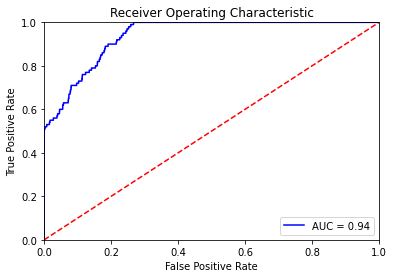

In [9]:
auc_b=np.trapz(tpr1, fpr1)
print("AUC_a:-",auc_b)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % auc_b)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### C. Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data 
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [3]:
df_c=pd.read_csv('5_c.csv')
df_c.head(10)

,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579
5,0,0.595387
6,0,0.370288
7,0,0.299273
8,0,0.297000
9,0,0.266479


In [4]:
 # write your code for task C

ds=df_c.sort_values("prob",axis=0,ascending=True)                        #sorting by value of "prob" asecending order
arr=np.array(df_c)
arr1=np.array(ds)
y_true=np.array(arr[:,0])
y_prob=np.array(arr[:,1])
thresholds=np.array(arr1[:,1])

def fn_fp(y_true, y_prob, thresholds):            
    fp_arr = []
    fn_arr = []
    for threshold in thresholds:
        y_pred = np.where(y_prob >= threshold, 1, 0)
        fp = np.sum((y_pred == 1) & (y_true == 0)) 
        fn = np.sum((y_pred == 0) & (y_true == 1))
        fp_arr.append(fp)
        fn_arr.append(fn)
    return fn_arr, fp_arr

fn,fp=fn_fp(y_true, y_prob, thresholds)

A=[]
for i in range(len(fn)):
    A.append((500*fn[i])+(100*fp[i]))
a=min(A)
I=A.index(a)


In [6]:
print("Fn:-",fn[I],"Fp:-",fp[I],"For which A is small")
print("The min value of metric A:-",a)
print("threshold:-",arr1[I,1])


Fn:- 78 Fp:- 1020 For which A is small
The min value of metric A:- 141000
threshold:- 0.2300390278970873



## D.</b></font> Compute performance metrics(for regression) for the given data 5_d.csv
<pre>    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [104]:
df_d=pd.read_csv('5_d.csv')
df_d.head(10)

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0
5,133.0,153.0
6,148.0,139.0
7,172.0,145.0
8,153.0,162.0
9,162.0,154.0


In [118]:
 # write your code for task 5d
arr=np.array(df_d)
y=np.array(arr[:,0])
pred=np.array(arr[:,1])

diff=[]
for i in range(len(arr)):
    diff.append(int(arr[i,0])-int(arr[i,1]))
    
ei=np.subtract(y,pred)
d=np.array(diff)
# MSE= avg of (y-pred)^2
MSE=((np.sum(np.power(d,2)))/len(d))               # Manual cal
MSE1=np.mean(np.power(ei,2))                       # Numpy  cal
print("MSE:-","Manual cal=",MSE,  "Numpy cal=",MSE1)


MAPE=np.mean(np.absolute(np.divide(ei,y)))                                     # MAPE = avg of abs((y-pred)/y)
print("MAPE:-", MAPE)
M_MAPE=np.sum(np.absolute(ei))/np.sum(y)                                       # M-MAPE = avg of abs(y-pred)/avg of (y)
print("M-MAPE:-", M_MAPE)

Y=np.mean(y)
SSr=np.sum(np.power(ei,2))
e=np.array(np.subtract(y,Y))
SSt=np.sum(np.power(e,2))
R2=1-(SSr/SSt)
print("R2:-",R2)

MSE:- Manual cal= 177.16569974554707 Numpy cal= 177.16569974554707
MAPE:- nan
M-MAPE:- 0.1291202994009687
R2:- 0.9563582786990937


<ipython-input-118-ca9488bc1004>:18: RuntimeWarning: divide by zero encountered in true_divide
  MAPE=np.mean(np.absolute(np.divide(ei,y)))                                     # MAPE = avg of abs((y-pred)/y)
<ipython-input-118-ca9488bc1004>:18: RuntimeWarning: invalid value encountered in true_divide
  MAPE=np.mean(np.absolute(np.divide(ei,y)))                                     # MAPE = avg of abs((y-pred)/y)
